In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [379]:
df = pd.read_csv('housing.csv')

In [380]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


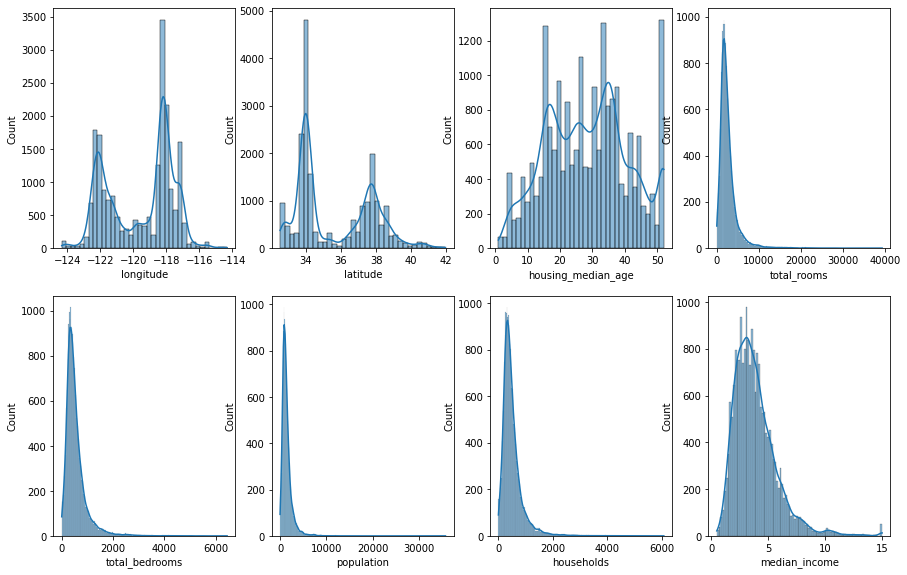

In [381]:
#Visualize the data

plt.figure(figsize=(15,15))
for i in range(8):
    ax = plt.subplot(3,4,i+1)
    sns.histplot(data=df, x=columns[i],kde=True)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[label_batch[i].numpy()])
#         plt.axis("off")

In [382]:
columns = df.columns
columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [383]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [384]:
df = df.dropna()

scaler = MinMaxScaler()

df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value','ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']] = scaler.fit_transform(
    df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value','ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

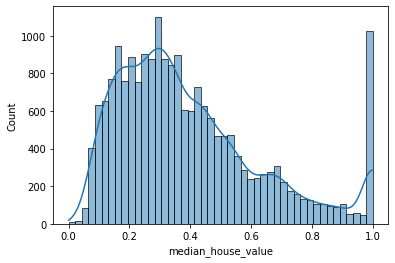

In [385]:
sns.histplot(df['median_house_value'],kde=True)

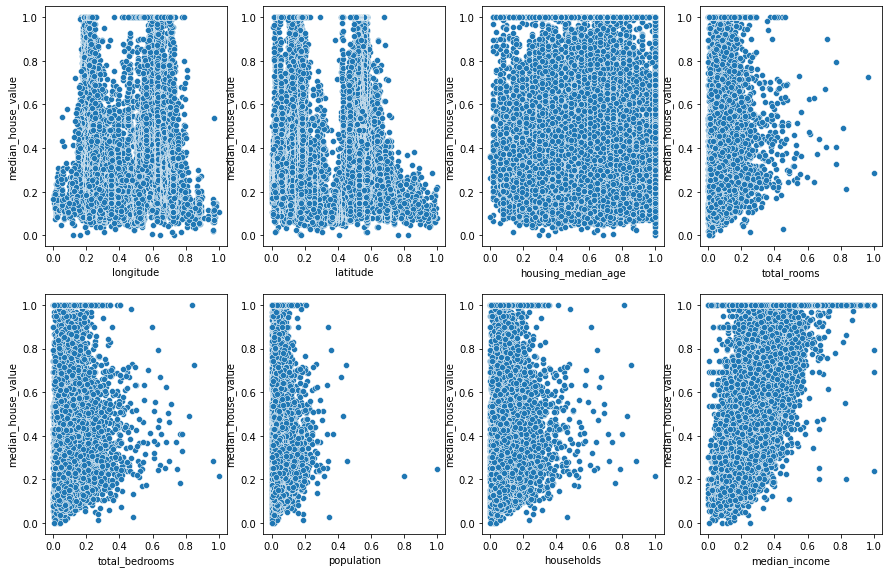

In [386]:
#Visualize the data

plt.figure(figsize=(15,15))
for i in range(8):
    ax = plt.subplot(3,4,i+1)
    sns.scatterplot(data=df, x=columns[i], y="median_house_value")
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[label_batch[i].numpy()])
#         plt.axis("off")

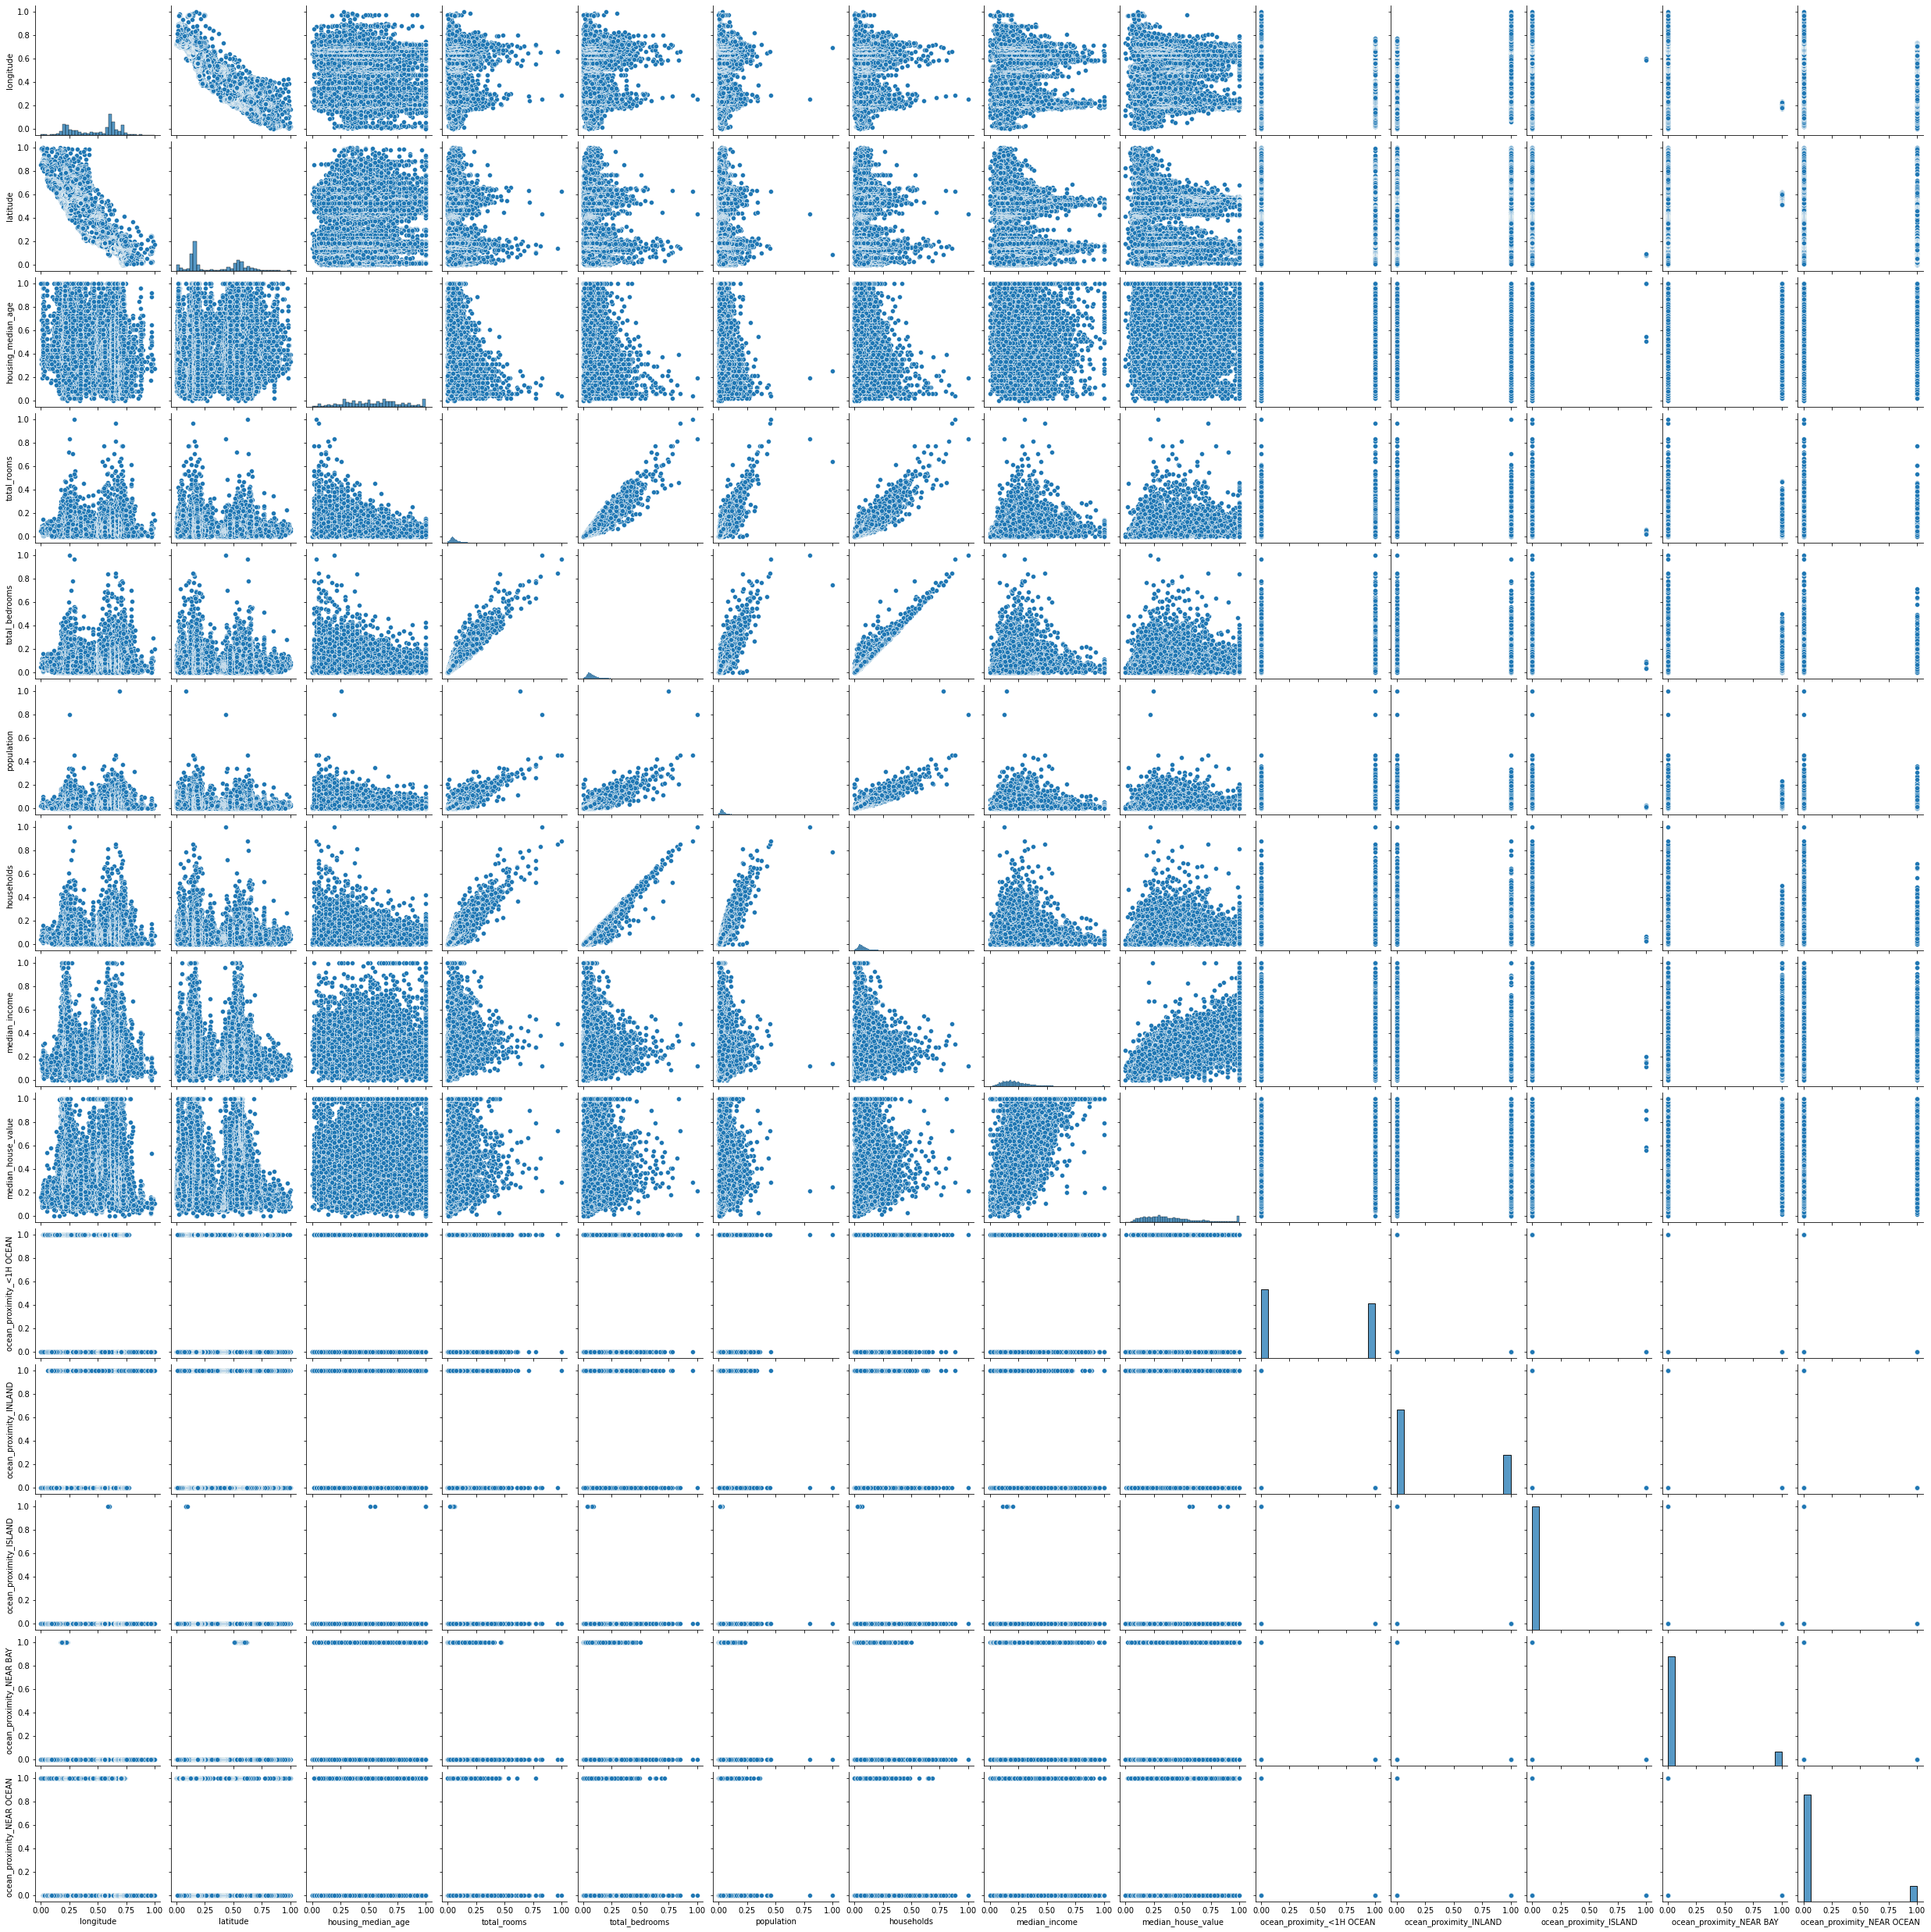

In [387]:
sns.pairplot(df)

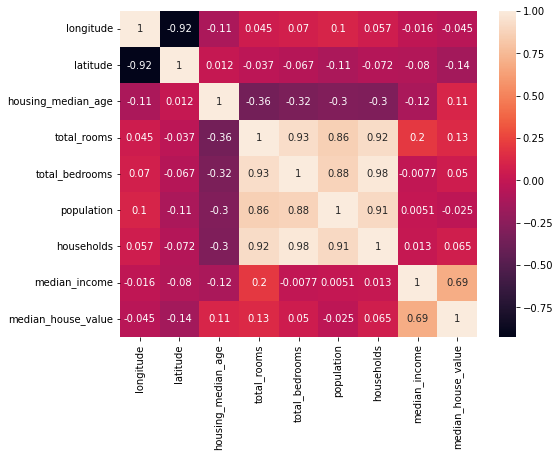

In [388]:
fig, ax = plt.subplots(figsize=(8,6))

df_temp = df[['longitude','latitude','housing_median_age','total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]

corrMatrix = df_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [389]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211,0.567,0.784,0.022,0.020,0.009,0.021,0.540,0.902,0.000,0.000,0.000,1.000,0.000
1,0.212,0.565,0.392,0.181,0.171,0.067,0.187,0.538,0.708,0.000,0.000,0.000,1.000,0.000
2,0.210,0.564,1.000,0.037,0.029,0.014,0.029,0.466,0.695,0.000,0.000,0.000,1.000,0.000
3,0.209,0.564,1.000,0.032,0.036,0.016,0.036,0.355,0.673,0.000,0.000,0.000,1.000,0.000
4,0.209,0.564,1.000,0.041,0.043,0.016,0.042,0.231,0.675,0.000,0.000,0.000,1.000,0.000


In [390]:
# Since total rooms,total bedrooms,population and households are highly correlated, we only select one of them.

X = df[['longitude','latitude','housing_median_age','households', 'median_income','ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y= df[['median_house_value']]

In [391]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [341]:
model_params = {
    
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            #######
        }  
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
             'alpha': [0.01,0.1,0.5,1.0]
         }
    },
#     'mlp_regression' : {
#         'model': MLPRegressor(),
#         'params': {
#              'hidden_layer_sizes': [(50,),(100,),(200,),(500,),(1000,)],
#              'alpha': [0.0001,0.001,0.01,0.1,0.5]
#          }
#     },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20]
         }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20,25]
         }
    },
    'knn_regression' : {
        'model': KNeighborsRegressor(),
        'params' : {
             'n_neighbors':[2,5,10,15,20,50]
         }
    },
    'svr_regression' : {
        'model': SVR(),
        'params' : {
             'C': [1,5,10],
#              'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
         }
    }
}

In [342]:
# Model Selection and hyper-parameter tuning 

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\L

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\029338502\AppData\L

,model,best_score,best_params
0,linear_regression,0.608,{}
1,ridge_regression,0.608,{'alpha': 0.5}
2,decision_tree,0.695,{'max_depth': 10}
3,random_forest,0.803,{'max_depth': 25}
4,knn_regression,0.696,{'n_neighbors': 10}
5,svr_regression,0.691,{'C': 10}


In [377]:
scores

[{'model': 'linear_regression',
  'best_score': 0.6078469224021997,
  'best_params': {}},
 {'model': 'ridge_regression',
  'best_score': 0.6078701106383599,
  'best_params': {'alpha': 0.5}},
 {'model': 'decision_tree',
  'best_score': 0.6949648254824089,
  'best_params': {'max_depth': 10}},
 {'model': 'random_forest',
  'best_score': 0.8028248622640323,
  'best_params': {'max_depth': 25}},
 {'model': 'knn_regression',
  'best_score': 0.6960998084919717,
  'best_params': {'n_neighbors': 10}},
 {'model': 'svr_regression',
  'best_score': 0.6913322678621217,
  'best_params': {'C': 10}}]

In [394]:
#We choose Random Forest Regressor with max_depth=25

regressor = RandomForestRegressor(max_depth=25)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

C:\Users\029338502\AppData\Local\Temp\ipykernel_220\180378819.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


0.8274671681576532